In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.decomposition  import FactorAnalysis

In [3]:
pd.options.display.max_rows=500
pd.options.display.max_columns

20

In [4]:
train_df = pd.read_csv("TrainingWiDS2021.csv")
#test_df = pd.read_csv("UnlabeledWiDS2021.csv")

In [5]:
#droping catagorical and id related data
train_df.drop(['hospital_id', 'hospital_admit_source', 'icu_id', 'readmission_status', 'gender', 'ethnicity', 'icu_admit_source', 'icu_admit_source','icu_admit_source','icu_stay_type','icu_type'], axis = 1, inplace = True)

In [6]:
train_df.head()

,Unnamed: 0,encounter_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,68.0,22.732803,0,180.3,0.541667,73.9,2.3,113.0,...,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,77.0,27.421875,0,160.0,0.927778,70.2,NaN,108.0,...,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,25.0,31.952749,0,172.7,0.000694,95.3,NaN,122.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,81.0,22.635548,1,165.1,0.000694,61.7,NaN,203.0,...,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,19.0,NaN,0,188.0,0.073611,NaN,NaN,119.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [7]:
train_df = train_df.iloc[:,1:]

In [8]:
print(train_df.info())
#print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130157 entries, 0 to 130156
Columns: 171 entries, encounter_id to diabetes_mellitus
dtypes: float64(157), int64(14)
memory usage: 169.8 MB
None


In [9]:
train_df.isnull().sum()

encounter_id                        0
age                              4988
bmi                              4490
elective_surgery                    0
height                           2077
pre_icu_los_days                    0
weight                           3463
albumin_apache                  78163
apache_2_diagnosis               1685
apache_3j_diagnosis               865
apache_post_operative               0
arf_apache                          0
bilirubin_apache                82560
bun_apache                      25411
creatinine_apache               24882
fio2_apache                     99720
gcs_eyes_apache                  2190
gcs_motor_apache                 2190
gcs_unable_apache                 709
gcs_verbal_apache                2190
glucose_apache                  14696
heart_rate_apache                 309
hematocrit_apache               26758
intubated_apache                    0
map_apache                        420
paco2_apache                    99720
paco2_for_ph

In [10]:
len(train_df)*.9

117141.3

In [11]:
thresh = len(train_df) * .9
train_df.dropna(thresh = thresh, axis = 1, inplace = True)

In [12]:
train_df.describe()

,encounter_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,d1_potassium_max,d1_potassium_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,126694.000000,128472.000000,129292.000000,130157.000000,...,117611.000000,117611.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,213000.856519,61.995103,29.110260,0.189840,169.607219,0.839933,83.791104,185.492683,565.994296,0.207111,...,4.253053,3.929256,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,38109.828146,16.822880,8.262776,0.392176,10.833085,2.485337,24.963063,85.858208,466.510850,0.405238,...,0.666942,0.579459,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,147000.000000,0.000000,14.844926,0.000000,137.200000,-0.250000,38.600000,101.000000,0.010000,0.000000,...,2.800000,2.400000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,180001.000000,52.000000,23.598006,0.000000,162.500000,0.045833,66.500000,113.000000,204.010000,0.000000,...,3.800000,3.600000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,213014.000000,64.000000,27.564749,0.000000,170.100000,0.155556,80.000000,122.000000,409.020000,0.000000,...,4.200000,3.900000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,246002.000000,75.000000,32.803127,0.000000,177.800000,0.423611,96.800000,301.000000,703.030000,0.000000,...,4.600000,4.300000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,279000.000000,89.000000,67.814990,1.000000,195.590000,175.627778,186.000000,308.000000,2201.050000,1.000000,...,7.000000,5.800000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
train_df.dtypes

encounter_id                     int64
age                            float64
bmi                            float64
elective_surgery                 int64
height                         float64
pre_icu_los_days               float64
weight                         float64
apache_2_diagnosis             float64
apache_3j_diagnosis            float64
apache_post_operative            int64
arf_apache                       int64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
heart_rate_apache              float64
intubated_apache                 int64
map_apache                     float64
resprate_apache                float64
temp_apache                    float64
ventilated_apache                int64
d1_diasbp_max                  float64
d1_diasbp_min                  float64
d1_diasbp_noninvasive_max      float64
d1_diasbp_noninvasive_min      float64
d1_heartrate_max         

In [14]:
#replacing missing age values with age mean
train_df['age'].replace(0, train_df['age'].mean())
train_df.fillna(train_df.mean(), inplace = True)

In [103]:
# Identifying colinearity
corr = train_df.corr()

In [104]:
co_pairs = corr.reset_index().melt(id_vars="index").query('1 > value > abs(.69)')

In [105]:
co_pairs

,index,variable,value


In [102]:
drop_list = ['h1_sysbp_noninvasive_max', 'h1_sysbp_max', 'h1_mbp_min', 'h1_heartrate_max', 'd1_sysbp_noninvasive_min',
             'd1_sysbp_noninvasive_max', 'h1_mbp_max', 'd1_mbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_min', 
             'd1_mbp_max', 'weight', 'elective_surgery', 'apache_post_operative', 'gcs_verbal_apache', 'd1_heartrate_max',
            'd1_temp_min', 'gcs_motor_apache','h1_diasbp_min','d1_diasbp_min','h1_diasbp_max','h1_sysbp_min']
train_df.drop([drop_list], axis = 1, inplace = True)

In [ ]:
# Factor Analysis

X = train_df.iloc[:,1:-1]
y = train_df.iloc[:,-1]

transformer = FactorAnalysis(random_state=0)

X_transformed = transformer.fit_transform(X)

In [ ]:
X_transformed

In [ ]:
#Random Forest Feature Selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
labels= train_df.iloc[:,1:-1].columns

labels = pd.DataFrame(columns=labels)

In [ ]:
X = train_df.iloc[:,1:-1].values
y = train_df.iloc[:,-1].values

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))

In [ ]:
sel.fit(X,y)

In [ ]:
#number of featuers selected
selected_feat = labels.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
#name of selected featuers
print(selected_feat)

In [ ]:
df = train_df[['encounter_id','diabetes_mellitus','age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache',
       'map_apache', 'resprate_apache', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_resprate_max', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_sysbp_max', 'h1_sysbp_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min']]

In [ ]:
df = train_df

In [107]:
train_df.head()

,encounter_id,age,bmi,height,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,gcs_unable_apache,...,d1_potassium_max,d1_potassium_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,68.0,22.732803,180.3,0.541667,113.0,502.01,0,3.00000,0.000000,...,4.000000,3.400000,0,0,0,0,0,0,0,1
1,246060,77.0,27.421875,160.0,0.927778,108.0,203.01,0,1.00000,0.000000,...,4.200000,3.800000,0,0,0,0,0,0,0,1
2,276985,25.0,31.952749,172.7,0.000694,122.0,703.03,0,3.00000,0.000000,...,4.253053,3.929256,0,0,0,0,0,0,0,0
3,262220,81.0,22.635548,165.1,0.000694,203.0,1206.03,0,4.00000,0.000000,...,5.000000,3.500000,0,0,0,0,0,0,0,0
4,201746,19.0,29.110260,188.0,0.073611,119.0,601.01,0,3.48829,0.011441,...,4.253053,3.929256,0,0,0,0,0,0,0,0


In [ ]:
train_df.head()

In [108]:
#splitting the final df into train and test sets
X = train_df.iloc[:,1:-1].values
y = train_df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [ ]:
#linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X,y)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_test

In [ ]:
output = zip(y_test, y_pred)

In [ ]:
output = pd.DataFrame(output)

In [ ]:
output

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [109]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [110]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
model.predict_proba(X_test)

array([[0.92463969, 0.07536031],
       [0.95872769, 0.04127231],
       [0.92321597, 0.07678403],
       ...,
       [0.4525735 , 0.5474265 ],
       [0.77061723, 0.22938277],
       [0.84400527, 0.15599473]])

In [112]:
pred = model.predict(X_test)

In [113]:
cm = confusion_matrix(y_test, pred)

In [114]:
cm

array([[19559,   945],
       [ 3994,  1534]], dtype=int64)

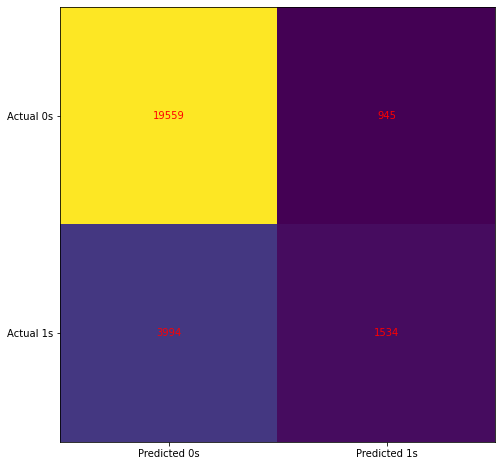

In [115]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
train_df.columns

In [ ]:
column_names = ['encounter_id','age', 'bmi', 'elective_surgery', 'height',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min',
       'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max',
       'h1_sysbp_noninvasive_min', 'd1_glucose_max', 'd1_glucose_min',
       'd1_potassium_max', 'd1_potassium_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis']

In [ ]:
unlabeled_df = pd.read_csv("UnlabeledWiDS2021.csv")

In [ ]:
unlabeled_df = unlabeled_df[column_names]

In [ ]:
#replacing missing age values with age mean
unlabeled_df['age'].replace(0, train_df['Age'].mean())
unlabeled_df.fillna(unlabeled_df.mean(), inplace = True)

In [ ]:
encoder = ce.OneHotEncoder(cols = ["ethnicity", "gender", "icu_admit_source",
"icu_stay_type","icu_type","apache_2_diagnosis","apache_3j_diagnosis"], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [ ]:
df_encoded = encoder.fit_transform(train_df)

In [ ]:
df_encoded.head()

In [ ]:
corr = df_encoded.corr()
corr

In [ ]:
s = corr.unstack()
so = s.sort_values(ascending = False, kind="quiksort")
type(so)

In [ ]:
so

# Notes

Are there areas where we may want to disaggregate the data? ex. it is likely that lab ranges and risk factors different for men vs. women?

look at attribute correlation